In [ ]:
import os
PROJECT_DIR = os.path.abspath(os.path.dirname(__file__) if '__file__' in globals() else os.getcwd())
os.environ['MPLCONFIGDIR'] = os.path.join(PROJECT_DIR, '.mplconfig')
os.environ['MPL_SKIP_MACOS_FONTS'] = '1'


# Does Lack of Sleep, Emotional Support, and Income Affect Alcohol Usage


Data Storytelling
    
    This capstone aims to understand the relationships between the independent variables such as: lack of sleep, lack of emotional support, and income and their influences on alcohol usage. Whether all three factors heavily influence alcohol usage will be examined as well as the individual relationships between the variables. It will be interesting to examine if lack of emotional support and low income are highly related and therefore influence alcohol usage. 

    According to the Centers for Disease Control (CDC, 2021), excessive alcohol usage causes over 178,000 deaths annually. This includes fatalities from conditions such as liver disease and various cancers, including breast cancer in women, colon cancer, liver cancer, and oral cavity cancer. Alcohol use is also associated with heart diseases like hypertension, stroke, and coronary heart illnesses. Additionally, it is a leading factor in more than 15,000 motor vehicle traffic crashes each year. 

	Numerous factors contribute to alcohol use. Stress, a common part of life, triggers changes in bodily systems, with prolonged chronic stress causing significant harm (Rasheed, 2016). Lack of sleep (Blackwelder et al, 2021), lack of emotional support (Dvorak et al, 2014), and low income (Karriker-Jaffe et al, 2013) are a small number of factors that are often tied to chronic stress that may induce alcohol usage. 

	As Blackwelder and colleagues (2021) found, lack of sleep was defined as less than 6 hours per night with self-reported findings of mental health statuses as “not good” over a 2-week period. Lack of sleep is just as dangerous as being under the influence of alcohol as response times, ability to deal with daily demands, and cognition are at a deficit.

	Lacking emotional support causes a person to feel quite alone and isolated from a high-demanding world. Social resources differ for those in different income brackets, and oftentimes, low income groups lack support all around. It has been found that women in poverty who lack social support as under high stress tend to use alcohol as a means to manage stress (Moos et al, 1989; Johnson & Jennison, 1994; McCreary & Sadava, 2000; Piece et al, 1996).

In [55]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

#Loading the Data
df = pd.read_csv('brfss_2022_final.csv')

# Display the first few rows of the DataFrame
print(df.head(10))

   DRNK3GE5  SLEPTIM1  EMTSUPRT  INCOME3  SEXVAR
0       NaN       8.0       1.0     99.0       2
1       NaN       6.0       1.0      5.0       2
2       NaN       5.0       2.0     10.0       2
3       NaN       7.0       1.0     77.0       2
4      88.0       9.0       1.0      5.0       2
5       NaN       7.0       2.0     99.0       1
6      88.0       7.0       1.0      8.0       2
7       NaN       8.0       1.0      7.0       2
8       NaN       6.0       1.0      7.0       2
9      88.0       7.0       1.0      7.0       2


In [57]:
# Summary stats
df.info()  # Check data types and missing values
df.describe()  # Get summary statistics
df.nunique()  # Unique values per column
df.isnull().sum()  # Count of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DRNK3GE5  209849 non-null  float64
 1   SLEPTIM1  445129 non-null  float64
 2   EMTSUPRT  254141 non-null  float64
 3   INCOME3   432200 non-null  float64
 4   SEXVAR    445132 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 17.0 MB


DRNK3GE5    235283
SLEPTIM1         3
EMTSUPRT    190991
INCOME3      12932
SEXVAR           0
dtype: int64

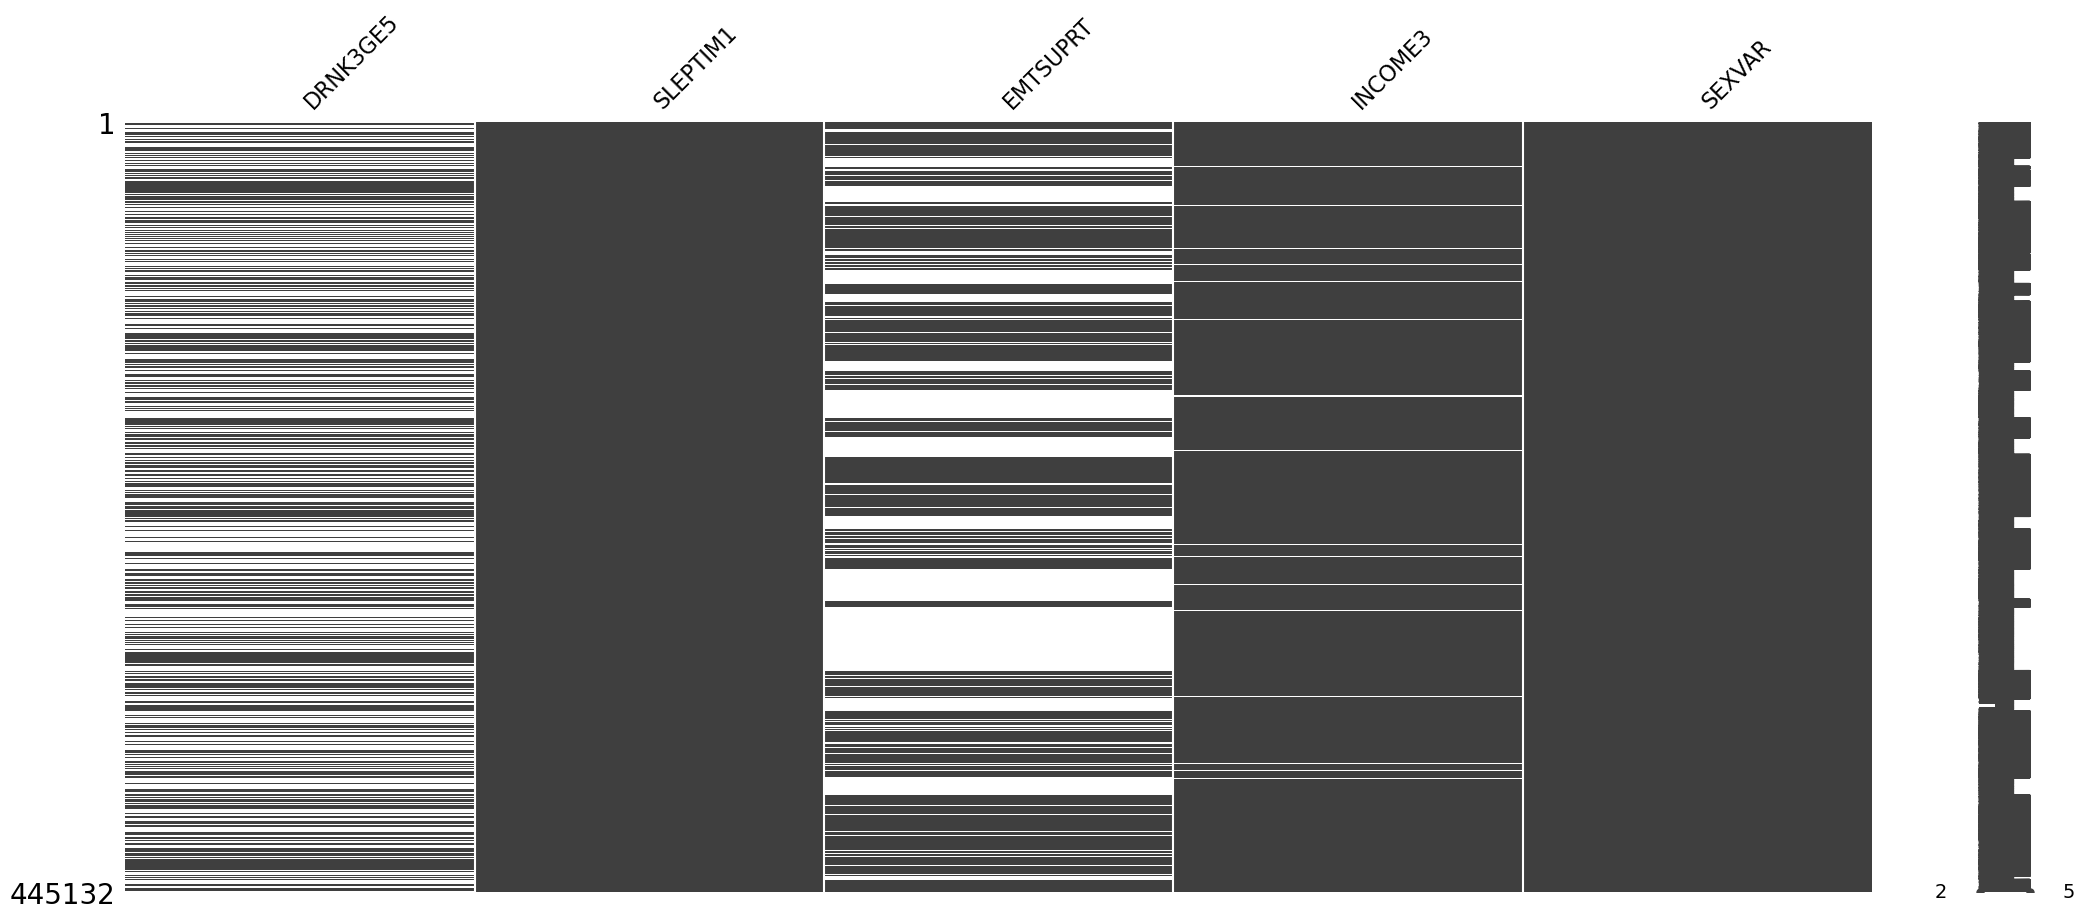

In [59]:
#Visualize missing data

msno.matrix(df)
plt.show()

In [61]:
# Clean data, replace missing codes with NaN
# Missing codes include 77, 88, 99

# Check for non-numeric data
print(df.dtypes)  # Check data types of all columns
print(df.applymap(type).nunique())  # Check unique data types in each column

DRNK3GE5    float64
SLEPTIM1    float64
EMTSUPRT    float64
INCOME3     float64
SEXVAR        int64
dtype: object


/var/folders/k9/14wtpz7n6dz958nl7hkt64lw0000gn/T/ipykernel_87032/2814955683.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(df.applymap(type).nunique())  # Check unique data types in each column


DRNK3GE5    1
SLEPTIM1    1
EMTSUPRT    1
INCOME3     1
SEXVAR      1
dtype: int64


In [63]:
# Convert all data to numerics

# Convert all columns to numeric, coercing errors
df_clean = df.apply(pd.to_numeric, errors='coerce')

# Ensure no `pd.NA` remains by replacing with NaN
df_clean = df_clean.replace({pd.NA: np.nan})

# Fill NaN with 0 or drop missing values (choose one)
df_clean = df_clean.fillna(0)  # Replace NaN with 0
# df_clean = df_clean.dropna()  # Alternative: Drop rows with missing values

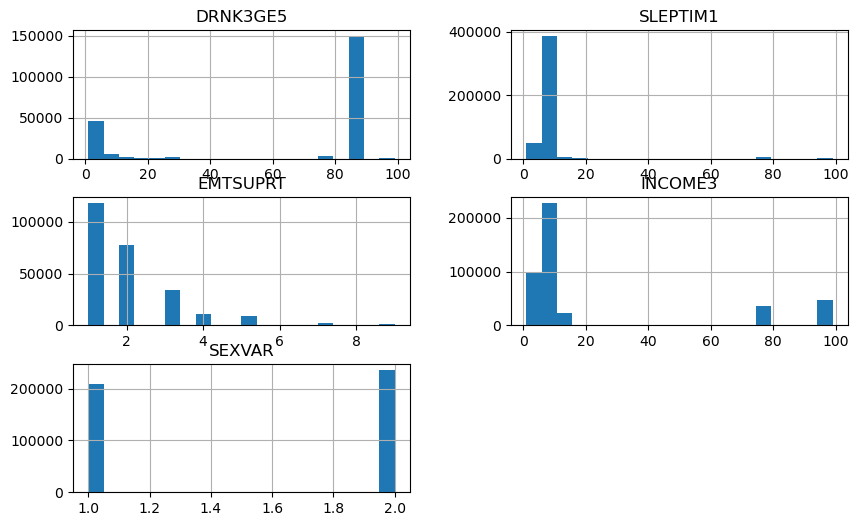

In [67]:
# Histogram to check distribution and outliers
df.hist(figsize=(10, 6), bins=20)
plt.show()

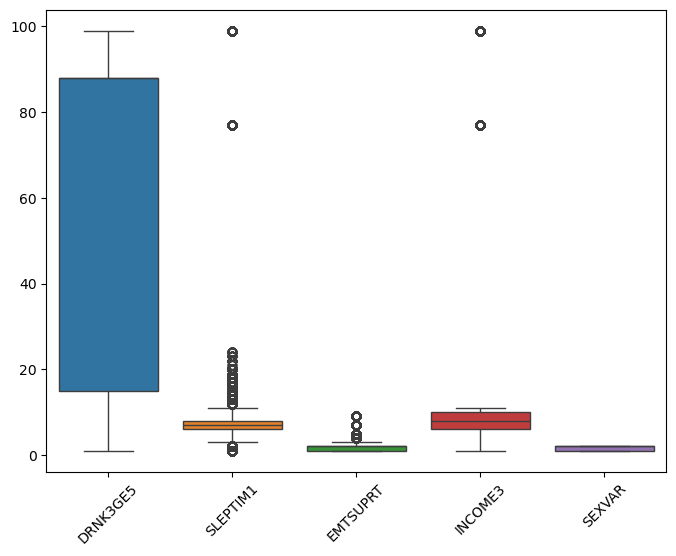

In [69]:
# Boxplot to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

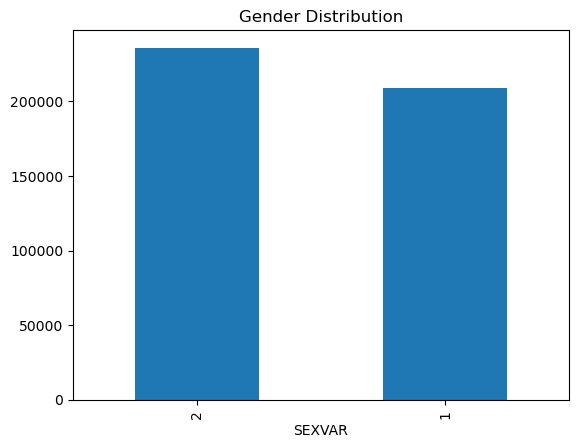

In [31]:
# Check gender distributions
df['SEXVAR'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.show()

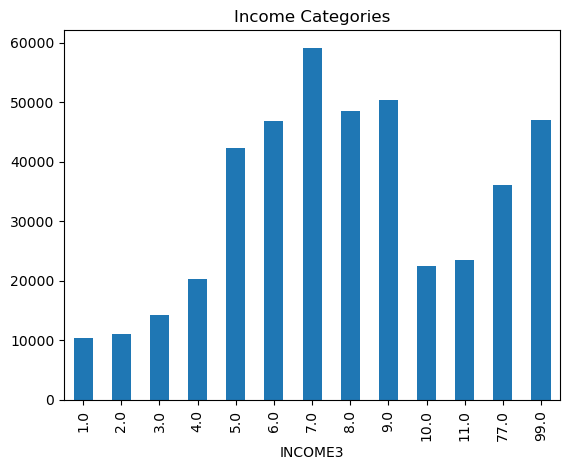

In [73]:
# Check income category distribution
df['INCOME3'].value_counts().sort_index().plot(kind='bar', title='Income Categories')
plt.show()

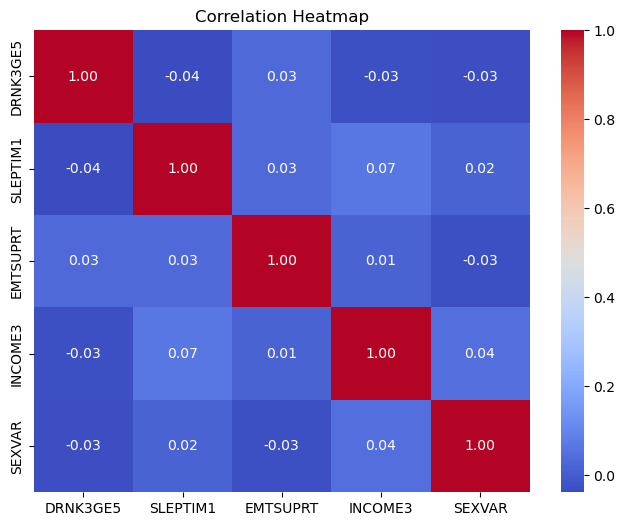

In [75]:
# Correlational Analysis
# Does sleep duration correlate with emotional support?

plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Based on the heatmap, the following correlationall findings are as follows: 

- Sleep time and drinking habits has an r = -0.04, which indicates a very weak negative correlation suggesting very little to no relationship. This means that the two variables are largely independent of each other. 
- Sleep time and income has an r = 0.07 indicating a weak but positive correlation suggesting that people sleep a little bit more as income increases.
- Sleep time and emotional support has an r= 0.03, which indicates a very weak negative correlation suggesting very little to no relationship. This means that the two variables are largely independent of each other. 
- Sleep and gender has an r = 0.02, which indicates a very weak negative correlation suggesting very little to no relationship. This means that the two variables are largely independent of each other. 

- Emotional support and income (r = 0.03) and drinking habits (r = 0.03) which indicates a very weak negative correlation suggesting very little to no relationship. This means that the two variables are largely independent of each other. 
- Emotional support and gender gender (r = -0.03) shows a weak negative correlation suggesting that women report slightly higher emotional support but not towards a significant difference compared to men. 

- Income and gender (r = 0.04) suggests a weak but positive correlation that is not statistically significant, but could suggest that men make more money than women.
- Income and drinking habits (r = -0.03) shows a weak negative correlation suggesting that as income increase, drinking habits decrease but again not statistically significant.

- Gender and drinking habits (r = -0.03) show a weak negative relationship that is not statistically significant, but could suggest that men drink slightly more than women. 


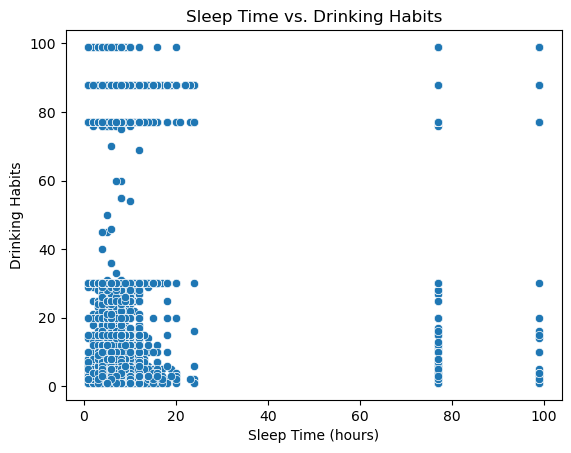

In [83]:
# Scatterplots

sns.scatterplot(x='SLEPTIM1', y='DRNK3GE5', data=df)
plt.title("Sleep Time vs. Drinking Habits")
plt.xlabel("Sleep Time (hours)")
plt.ylabel("Drinking Habits")
plt.show()

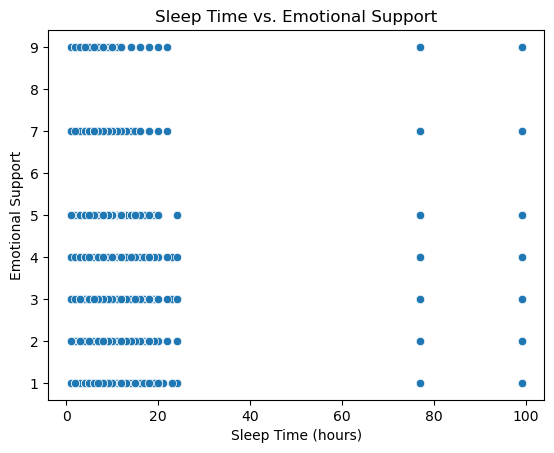

In [85]:
sns.scatterplot(x='SLEPTIM1', y='EMTSUPRT', data=df)
plt.title("Sleep Time vs. Emotional Support")
plt.xlabel("Sleep Time (hours)")
plt.ylabel("Emotional Support")
plt.show()

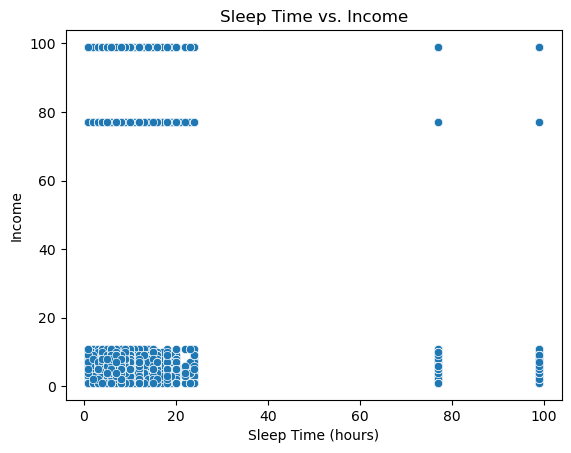

In [87]:
sns.scatterplot(x='SLEPTIM1', y='INCOME3', data=df)
plt.title("Sleep Time vs. Income")
plt.xlabel("Sleep Time (hours)")
plt.ylabel("Income")
plt.show()

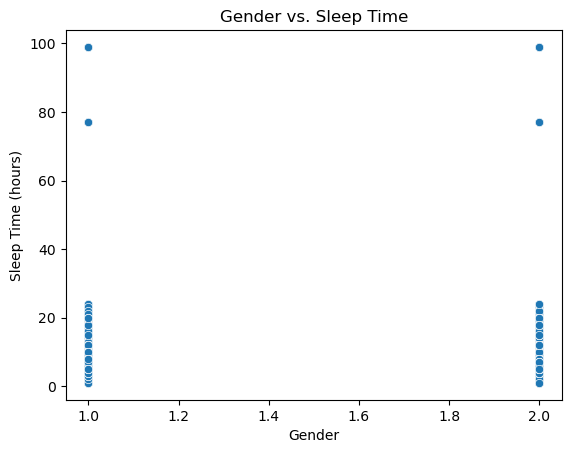

In [89]:
sns.scatterplot(x='SEXVAR', y='SLEPTIM1', data=df)
plt.title("Gender vs. Sleep Time")
plt.xlabel("Gender")
plt.ylabel("Sleep Time (hours)")
plt.show()

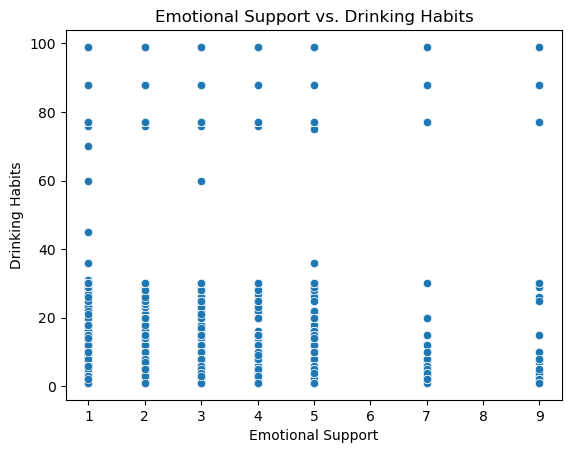

In [91]:
sns.scatterplot(x='EMTSUPRT', y='DRNK3GE5', data=df)
plt.title("Emotional Support vs. Drinking Habits")
plt.xlabel("Emotional Support")
plt.ylabel("Drinking Habits")
plt.show()

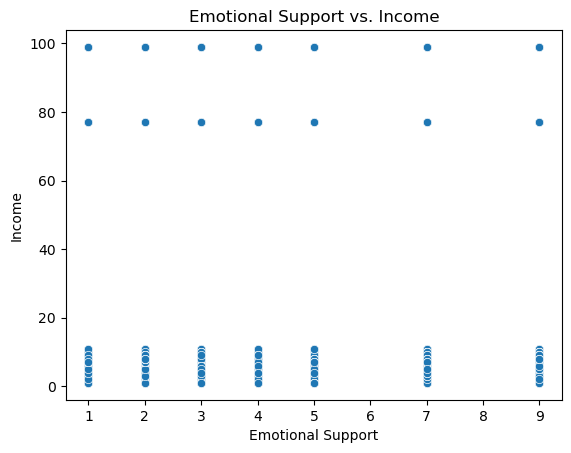

In [93]:
sns.scatterplot(x='EMTSUPRT', y='INCOME3', data=df)
plt.title("Emotional Support vs. Income")
plt.xlabel("Emotional Support")
plt.ylabel("Income")
plt.show()

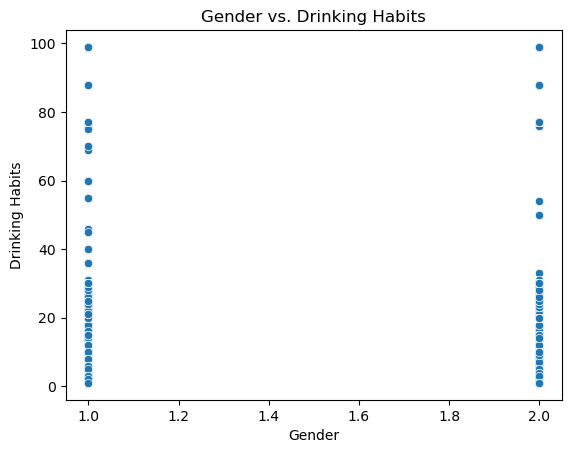

In [95]:
sns.scatterplot(x='SEXVAR', y='DRNK3GE5', data=df)
plt.title("Gender vs. Drinking Habits")
plt.xlabel("Gender")
plt.ylabel("Drinking Habits")
plt.show()

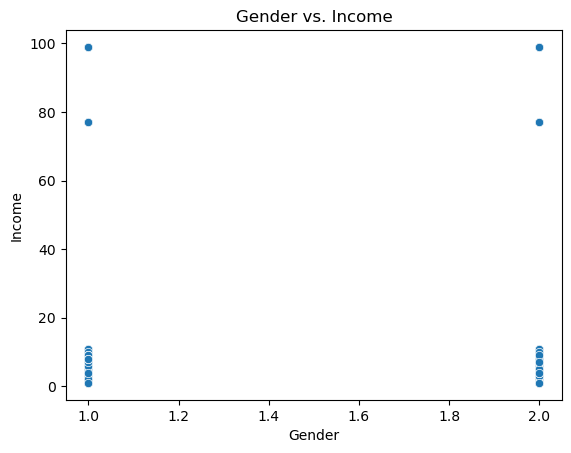

In [97]:
sns.scatterplot(x='SEXVAR', y='INCOME3', data=df)
plt.title("Gender vs. Income")
plt.xlabel("Gender")
plt.ylabel("Income")
plt.show()

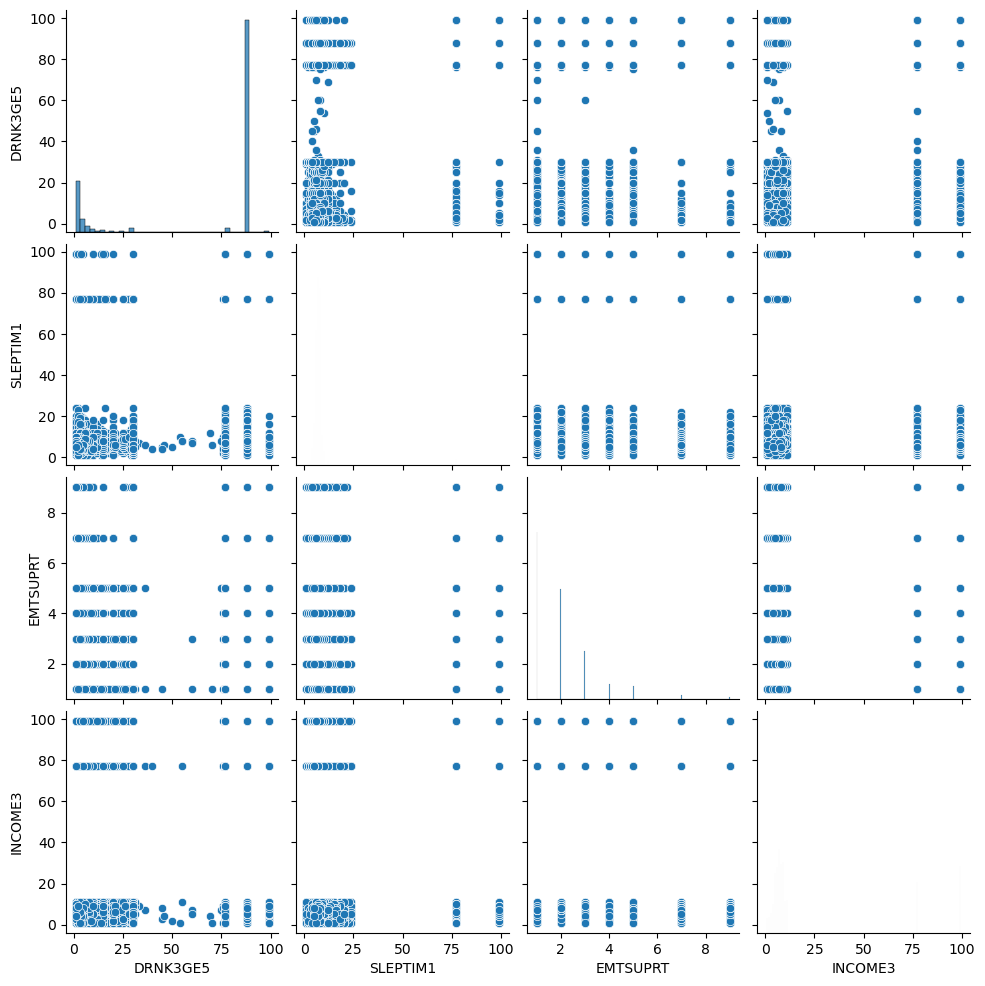

In [99]:
# Looking at relationships between all variables by using a pairplot

sns.pairplot(df[['DRNK3GE5', 'SLEPTIM1', 'EMTSUPRT', 'INCOME3']])
plt.show()

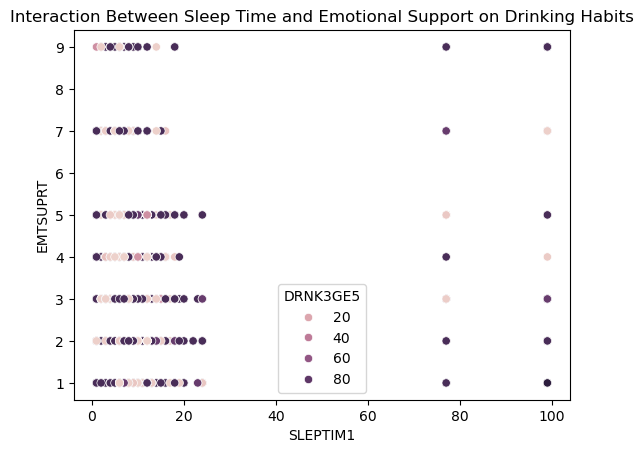

In [101]:
# Bivariate analysis because several IV (SLEPTIM1, EMTSUPRT, INCOME3) influencing alcohol usage
# Let's see if there are any interaction effects
sns.scatterplot(x='SLEPTIM1', y='EMTSUPRT', hue='DRNK3GE5', data=df)
plt.title("Interaction Between Sleep Time and Emotional Support on Drinking Habits")
plt.show()

- There are no trends that are positive or negative to indicate any type of relationship.
- There are however, clusters around sleep time between 0-20 hours with an emotional support ranging from low to medium and a mix of drinking habits that is hard to tell from the plot.
- Some outliers do include some points of people sleeping a lot which might misentered data. 